In [1]:
import torch
from torchvision.transforms import ToTensor
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from model import STR_Model
from util.stroke_plotting import get_strokes, plot_word_strokes, plot_str_word_strokes, animate_word

def predict(model: STR_Model, input: torch.Tensor, device: torch.device) -> torch.Tensor:
    ''' Predicts the output sequence for the input sequence.'''
    model.eval()
    with torch.no_grad():
        output = model(input.to(device))
    return output

def get_strokes_from_model_output(pred) -> list:
    ''' Get strokes from the model output.'''
    print(pred.shape)
    pred = pred.cpu().detach().numpy()
    pred[:, 2] = np.round(pred[:, 2])
    pred[:, 3] = np.round(pred[:, 3])
    
    return pred

def display_img(img):
    plt.imshow(img.squeeze(0).permute(1, 2, 0), cmap='gray')
    plt.show()

In [2]:
img_id = 42
img_path = f'../../DataSet/IAM-Online/Resized_Dataset/Train/Images/image_{img_id}.png'
model_path = './checkpoints/STR_model_0_17426.pth'

# Load the image
img = Image.open(img_path).convert('L')
img = ToTensor()(img)
img.unsqueeze_(0)

# Load the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = STR_Model().to(device)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [3]:
# Predict the output
pred = predict(model, img, device)
strokes = get_strokes_from_model_output(pred.squeeze(1))

torch.Size([59, 4])


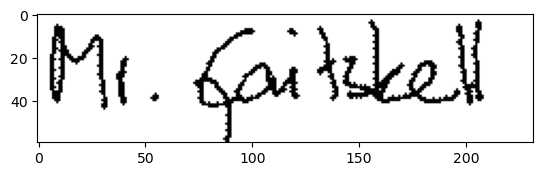

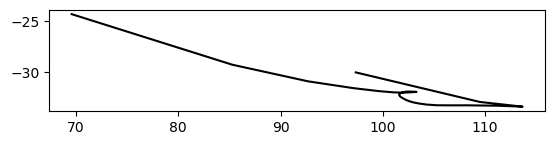

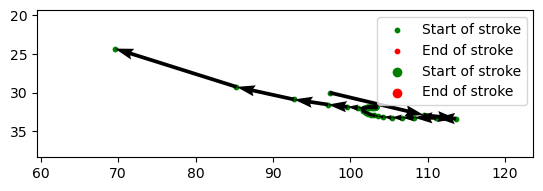

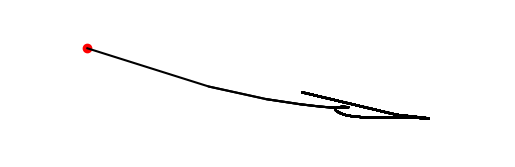

In [4]:
display_img(img)
plot_word_strokes(strokes, split_strokes=False)
plot_str_word_strokes(strokes, split_strokes=False)
animate_word(strokes, speed=1, save_path='./predict.gif', split_strokes=False)

18794.912117141626


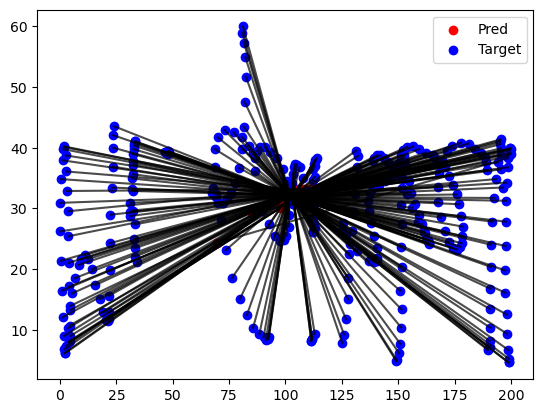

In [5]:
# If you have the ground truth strokes, you can visualize the DTW path as below 
from fastdtw import fastdtw
from loss.dtw_alignment import plot_dtw_path

target_stroke = f'../../DataSet/IAM-Online/Resized_Dataset/Train/Strokes/stroke_{img_id}.npy'
target_stroke = np.load(target_stroke)
target_stroke = np.delete(target_stroke, 2, 1)

distance, path = fastdtw(strokes, target_stroke, dist=2)
print(distance)
plot_dtw_path(strokes, target_stroke, path)